In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [2]:
#more import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from pathlib import Path
from sklearn import svm, preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [3]:
path = Path('/kaggle/input/diamonds/diamonds.csv')
df = pd.read_csv(path)

Lets check head of the DataFrame

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


all object Dtypes should be converted into numerical or categorical data type. cut, color and clarity are categorical and index column is useless(Unnamed: 0) in this case . And we should check for the null,NaN values first.

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.isnull().sum(),df.isna().sum()

(carat      0
 cut        0
 color      0
 clarity    0
 depth      0
 table      0
 price      0
 x          0
 y          0
 z          0
 dtype: int64,
 carat      0
 cut        0
 color      0
 clarity    0
 depth      0
 table      0
 price      0
 x          0
 y          0
 z          0
 dtype: int64)

clarity, from top to bottom tier

IF -> VVS1 -> VVS2 -> VS1 -> VS2 -> SI1 -> SI2 -> I1

diamond color tier list

D -> E -> F -> G -> H -> I -> J

diamond cut tier

Ideal -> Premium -> Very Good -> Good -> Fair

In [8]:
df.clarity = df.clarity.astype('category')
d1 = dict(enumerate(df.clarity.cat.categories))
d1

{0: 'I1',
 1: 'IF',
 2: 'SI1',
 3: 'SI2',
 4: 'VS1',
 5: 'VS2',
 6: 'VVS1',
 7: 'VVS2'}

In [9]:
df.cut = df.cut.astype('category')
d2 = dict(enumerate(df.cut.cat.categories))
d2

{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}

In [10]:
df.color = df.color.astype('category')
d3 = dict(enumerate(df.color.cat.categories))
d3

{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}

In [11]:
df.clarity.cat.reorder_categories(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],inplace=True)
df.cut.cat.reorder_categories(['Fair','Good','Very Good','Premium','Ideal'],inplace=True)
df.color.cat.reorder_categories(['J','I','H','G','F','E','D'],inplace=True)

In [12]:
df.clarity = df.clarity.cat.codes
df.cut = df.cut.cat.codes
df.color = df.color.cat.codes

Now all columns are numerical and we can visualize the data

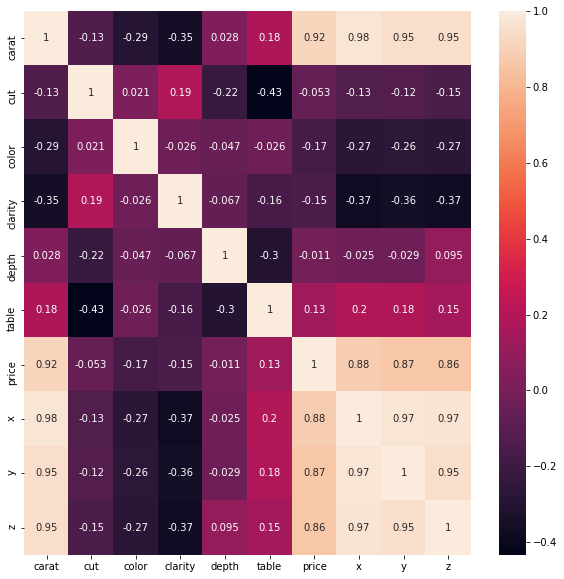

In [13]:
correlation = df.corr()
plt.figure(1,figsize=(10,10))
sns.heatmap(correlation,annot=True)    

Price is highly dependent on it's mass(carat) and size(X,Y,Z) ,so let's check first how this parameters are distributed

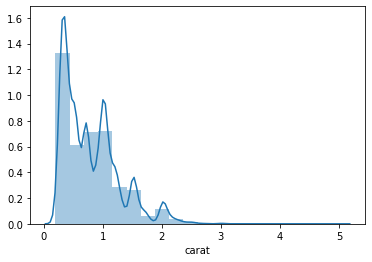

In [14]:
sns.distplot(df['carat'] , bins = 20)

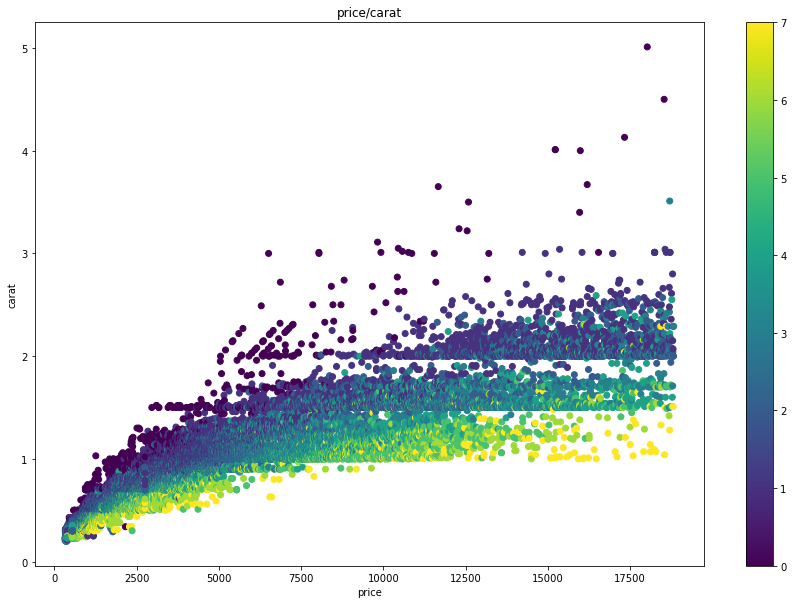

In [15]:
fig = plt.figure(1, figsize = (15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df['price'],df['carat'],c=df.clarity)
ax.set_title('price/carat')
ax.set_xlabel('price')
ax.set_ylabel('carat')
plt.colorbar(scatter)

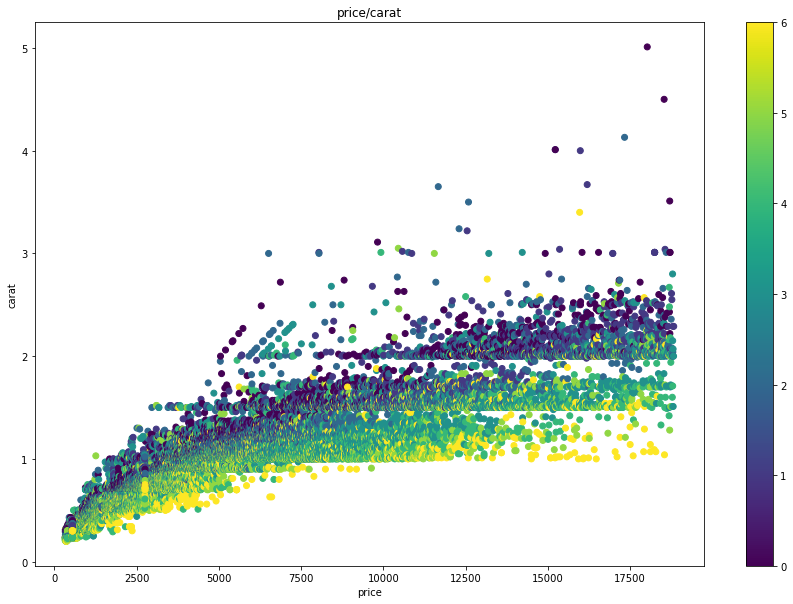

In [16]:
fig = plt.figure(1, figsize = (15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df['price'],df['carat'],c=df.color)
ax.set_title('price/carat')
ax.set_xlabel('price')
ax.set_ylabel('carat')
plt.colorbar(scatter)

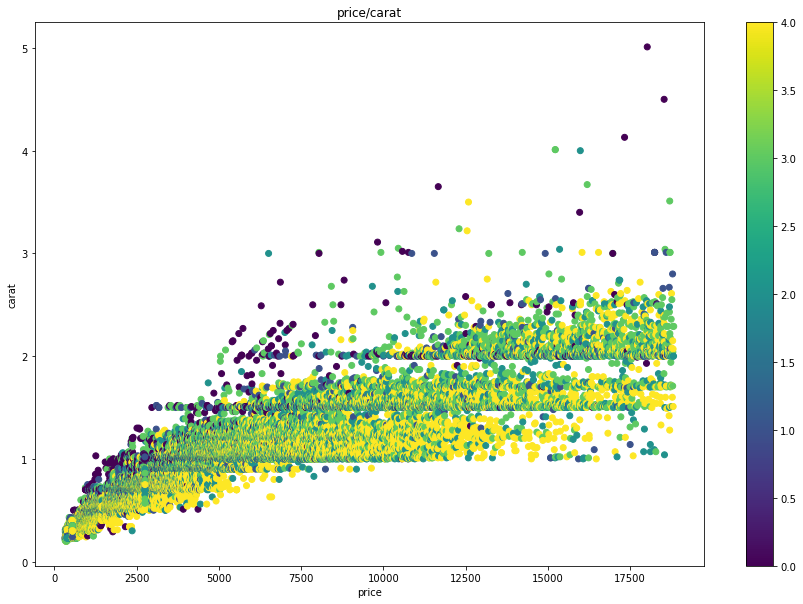

In [17]:
fig = plt.figure(1, figsize = (15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df['price'],df['carat'],c=df.cut)
ax.set_title('price/carat')
ax.set_xlabel('price')
ax.set_ylabel('carat')
plt.colorbar(scatter)

Huge diamons are almost never have high clarity, and high clarity still makes huge impact on the price. Same goes with the color. Cut quality also affects the price , making price/carat relationship non-linear.

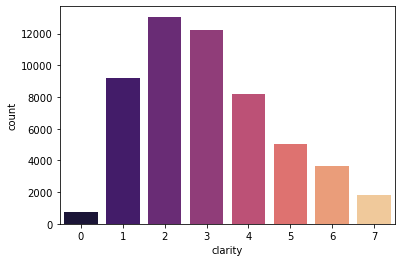

In [18]:
sns.countplot(x='clarity',data=df,palette="magma")

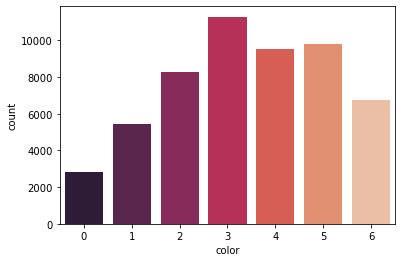

In [19]:
sns.countplot(x='color',data=df,palette="rocket")

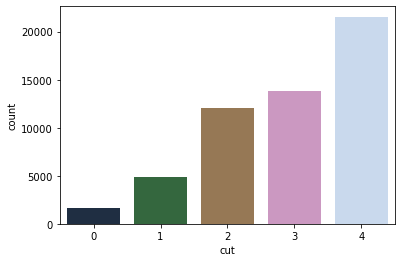

In [20]:
sns.countplot(x='cut',data=df,palette="cubehelix")

high clarity diamons are very rare. Good quality cut and color are common

**FEATURE SCALING**

In [21]:
scaler = StandardScaler()

In [22]:
X = scaler.fit_transform(df.drop(['price'],axis=1))
y = scaler.fit_transform(df[['price']])

In [23]:
df.shape,X.shape,y.shape

((53940, 10), (53940, 9), (53940, 1))

train \ test set split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((43152, 9), (10788, 9), (43152, 1), (10788, 1))

**creating model** with default settings first . we need metrics as well

In [25]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

In [26]:
pred = model.predict(X_test)

In [27]:
mse = mean_squared_error(pred,y_test)
rmse = np.sqrt(mean_squared_error(pred,y_test))
mse,rmse

(0.03157533219494755, 0.177694491177829)

numbers are normalized , to get the idea about price deviation we need unfold price back

In [28]:
ITpred = scaler.inverse_transform(pred)
ITpred.shape

(10788, 1)

In [29]:
ITytest = scaler.inverse_transform(y_test)
ITytest.shape

(10788, 1)

In [30]:
ITmse = mean_squared_error(ITpred,ITytest)
ITrmse = np.sqrt(mean_squared_error(ITpred,ITytest))
ITmse,ITrmse

(502531.9694920282, 708.8948931202906)

In [31]:
model.score(X_test,y_test)

0.9682978738777106

**PARAMETER TUNING**

In [32]:
ptmodel = KNeighborsRegressor()
ptrange = np.arange(1,11)
ptparams = ({'n_neighbors': ptrange})
gridsearch = GridSearchCV(ptmodel,ptparams,cv=10)

In [33]:
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'n_neighbors': 8}

re-creating model with best params

In [34]:
GSmodel = KNeighborsRegressor(n_neighbors=8)
GSmodel.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [35]:
GSpred = GSmodel.predict(X_test)
GSmse = mean_squared_error(GSpred,y_test)
GSrmse = np.sqrt(mean_squared_error(GSpred,y_test))
GSmse,GSrmse

(0.031542984577141615, 0.1776034475373201)

In [36]:
GSITpred = scaler.inverse_transform(GSpred)
GSITpred.shape

(10788, 1)

In [37]:
GSITytest = scaler.inverse_transform(y_test)
GSITytest.shape

(10788, 1)

In [38]:
GSITmse = mean_squared_error(GSITpred,GSITytest)
GSITrmse = np.sqrt(mean_squared_error(GSITpred,GSITytest))
GSITmse,GSITrmse

(502017.14633881394, 708.5316833697798)

In [39]:
GSmodel.score(X_test,y_test)

0.9683303513906346

we've got a bit better results . so, final score

MSE:502017.1463

RMSE:708.5316